In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.csv')

In [3]:
# Выделить описательные переменные (вроде пола, работы и т.п.) на понятный для машины язык: get_dummies

In [4]:
display(cacao.head(10))
cacao.info() 

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
Bar id                              1795 non-null int64
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [5]:
cacao.columns

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

In [6]:
cacao.columns = ['bar_id', 'company', 'specific_origin', 'ref', 'review_date', 
                 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_origin']

1795


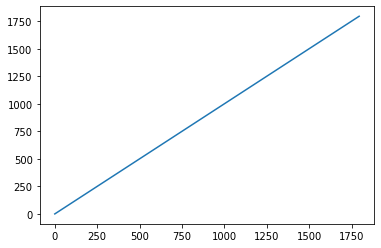

In [7]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)

In [8]:
cacao

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1791,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1792,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1793,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1794,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [9]:
cacao.drop(['bar_id'], inplace = True, axis = 1)

In [10]:
pd.DataFrame(cacao.company.value_counts())

,company
,99
Soma,45
Fresco,26
Bonnat,26
Pralus,25
...,...
Nanea,1
Cloudforest,1
Monsieur Truffe,1
Vintage Plantations,1


In [11]:
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)

In [12]:
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

,company
Soma,45
Bonnat,26
Fresco,26
Pralus,25
Domori,22
...,...
Heirloom Cacao Preservation (Fruition),1
Black River (A. Morin),1
Cacao Market,1
Solkiki,1


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
company    1696 non-null object
dtypes: object(1)
memory usage: 14.1+ KB


In [13]:
pd.DataFrame(cacao.specific_origin.value_counts())

,specific_origin
,58
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
...,...
St. Lucia,1
"Tawau, Oct. 2015 Harvest",1
Colombian 2008,1
"Lumas, 2015 Harvest, Batch 6, brown sugar",1


In [14]:
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)

In [15]:
display(pd.DataFrame(cacao.specific_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.specific_origin.value_counts()>10).sum())
cacao.loc[:, ['specific_origin']].info()

,specific_origin
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
Venezuela,21
...,...
"Carenero Superior, Concepcion",1
St. Lucia,1
"Tawau, Oct. 2015 Harvest",1
Colombian 2008,1


Значений, встретившихся в столбце более 10 раз: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
specific_origin    1737 non-null object
dtypes: object(1)
memory usage: 14.1+ KB


count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

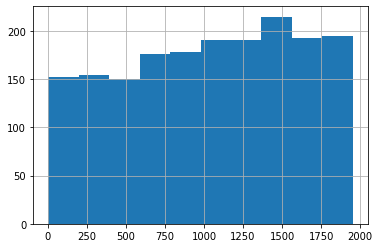

In [16]:
cacao.ref.hist()
cacao.ref.describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

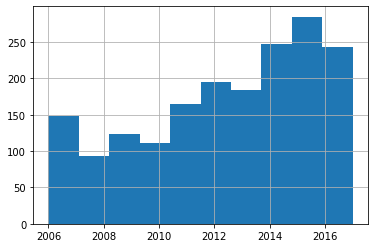

In [17]:
cacao.review_date.hist()
cacao.review_date.describe()

In [18]:
cacao.cocoa_percent

0        63%
1        70%
2       670%
3        70%
4        70%
        ... 
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

In [19]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

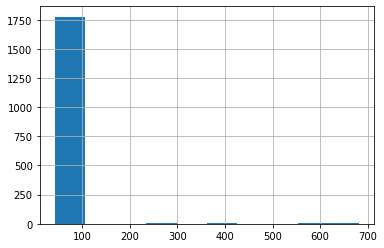

In [20]:
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

70.0 5.0 62.5 77.5


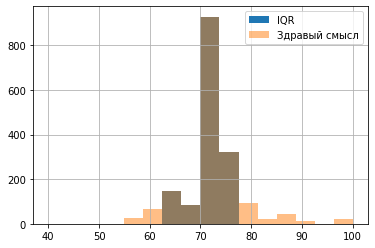

In [21]:
median = cacao.cocoa_percent.median()
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
print(median, IQR, median - 1.5*IQR, median + 1.5*IQR)
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(median - 1.5*IQR, median + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (40, 100), 
                                                                                             label = 'IQR')
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100),
                                                        label = 'Здравый смысл')
plt.legend();

In [22]:
cacao = cacao.loc[cacao.cocoa_percent <= 100]

In [23]:
cacao

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,11.50,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,,India


In [24]:
cacao.company_location


0        France
1        France
3        France
4        France
5        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: company_location, Length: 1776, dtype: object

In [25]:
display(pd.DataFrame(cacao.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum())
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Ghana,1
Martinique,1
Niacragua,1
Russia,1


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
company_location    1776 non-null object
dtypes: object(1)
memory usage: 27.8+ KB


In [26]:
cacao.rating

0       11.50
1        2.75
3        3.50
4        3.50
5        2.75
        ...  
1790     3.75
1791     3.00
1792     3.50
1793     3.25
1794     3.00
Name: rating, Length: 1776, dtype: float64

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

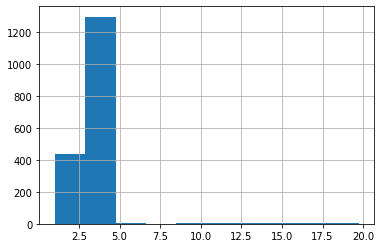

In [27]:
cacao.rating.hist()
cacao.rating.describe()


25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


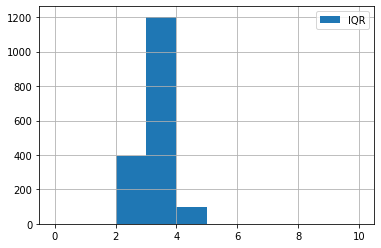

In [28]:
median = cacao.rating.median()
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

In [29]:
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [30]:
cacao.bean_type.value_counts()[cacao.bean_type.value_counts()>10]

                        829
Trinitario              401
Criollo                 147
Forastero                81
Forastero (Nacional)     50
Criollo, Trinitario      37
Blend                    36
Forastero (Arriba)       30
Name: bean_type, dtype: int64

In [31]:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)

C:\Users\PL\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
cacao.bean_type.value_counts()[cacao.bean_type.value_counts()>10]

Trinitario              401
Criollo                 147
Forastero                81
Forastero (Nacional)     50
Criollo, Trinitario      37
Blend                    36
Forastero (Arriba)       30
Name: bean_type, dtype: int64

In [33]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
bean_type    861 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


In [34]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [35]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
Matina,3
EET,3
Beniano,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
bean_type    860 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


In [36]:
cacao.broad_origin = cacao.broad_origin.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [37]:
cacao.broad_origin.value_counts()[cacao.broad_origin.value_counts()>10]

Venezuela             202
Ecuador               179
Peru                  159
Madagascar            138
Dominican Republic    135
Nicaragua              57
Brazil                 57
Bolivia                53
Belize                 49
Papua New Guinea       41
Colombia               38
Vietnam                38
Costa Rica             36
Trinidad               32
Ghana                  31
Tanzania               30
Mexico                 28
Hawaii                 26
Guatemala              26
Domincan Republic      24
Jamaica                18
Indonesia              16
Grenada                16
Honduras               15
Cuba                   11
Name: broad_origin, dtype: int64

In [38]:
len(cacao.broad_origin.value_counts()[cacao.broad_origin.value_counts()>10])

25

In [39]:
#cacao.broad_origin = cacao.broad_origin.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
#                      else x if '(' not in x else x[:x.find('(')].strip())

In [40]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,159
Madagascar,138
Dominican Republic,135
...,...
"Cost Rica, Ven",1
"Trinidad, Ecuador",1
Carribean(DR/Jam/Tri),1
Trinidad-Tobago,1


Значений, встретившихся в столбце более 10 раз: 25
Уникальных значений: 97
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
broad_origin    1631 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


In [41]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))

,broad_origin
Venezuela,202
Ecuador,179
Peru,159
Madagascar,138
Dominican Republic,135
...,...
"Cost Rica, Ven",1
"Trinidad, Ecuador",1
Carribean(DR/Jam/Tri),1
Trinidad-Tobago,1


In [42]:
cacao.broad_origin.value_counts()[cacao.broad_origin.value_counts()>10]

Venezuela             202
Ecuador               179
Peru                  159
Madagascar            138
Dominican Republic    135
Nicaragua              57
Brazil                 57
Bolivia                53
Belize                 49
Papua New Guinea       41
Colombia               38
Vietnam                38
Costa Rica             36
Trinidad               32
Ghana                  31
Tanzania               30
Mexico                 28
Hawaii                 26
Guatemala              26
Domincan Republic      24
Jamaica                18
Indonesia              16
Grenada                16
Honduras               15
Cuba                   11
Name: broad_origin, dtype: int64

In [43]:
(cacao.broad_origin.value_counts()>10).sum()

25

In [44]:
(cacao.broad_origin.value_counts()>10).sum()

25

In [45]:
len(cacao.broad_origin.value_counts()[cacao.broad_origin.value_counts()>10])

25

In [46]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [47]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries).sort_values()

In [48]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
DominicanRepublic,135
...,...
"DomincanRepublic,Madagascar",1
"Venezuela,Africa,Brasil,Peru,Mexico",1
Suriname,1
"Grenada,PapuaNewGuinea,Hawaii,Haiti,Madagascar",1


Значений, упомянутых более 10 раз: 25
Уникальных значений: 93
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
broad_origin    1630 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


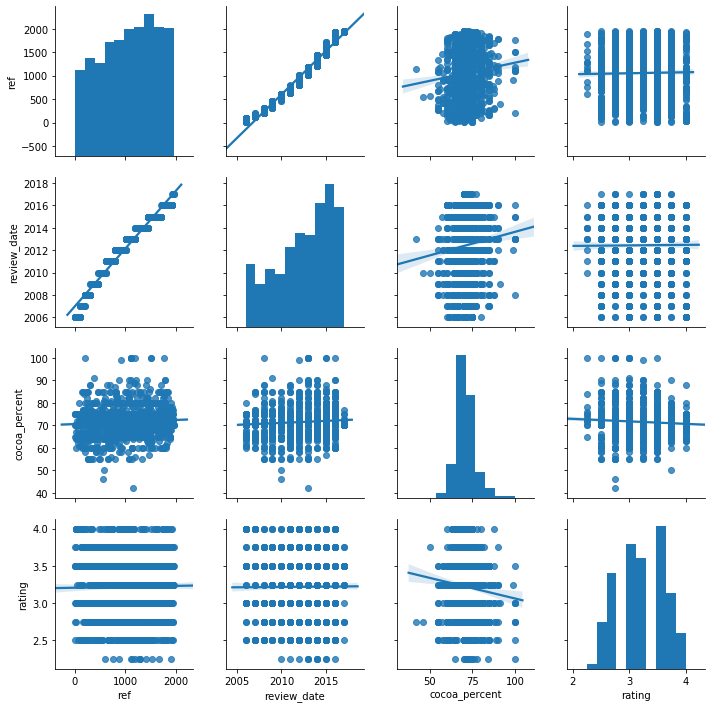

In [49]:
sns.pairplot(cacao, kind = 'reg')

In [50]:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


In [51]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45) # Names of column down the picture
    ax.set_title('Boxplot for ' + column)
    plt.show()
    

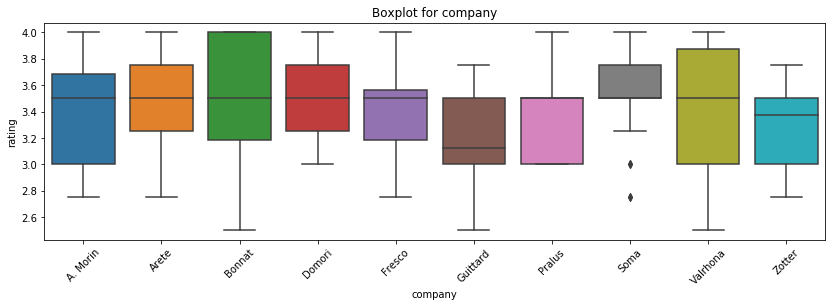

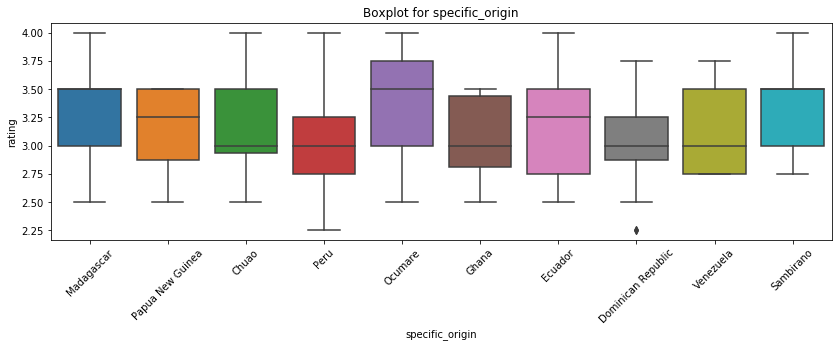

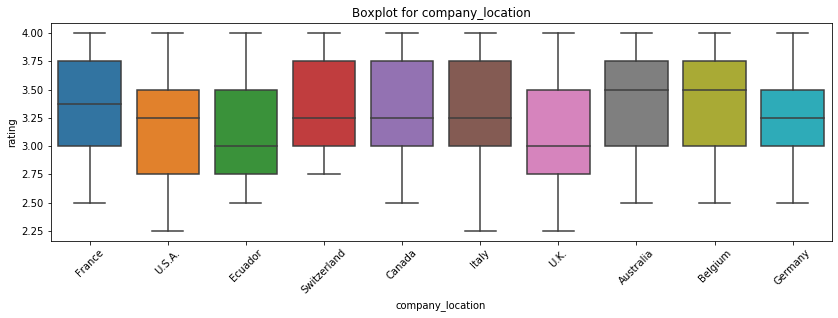

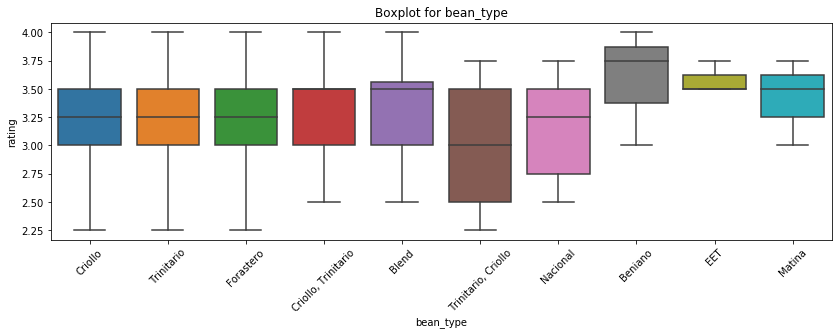

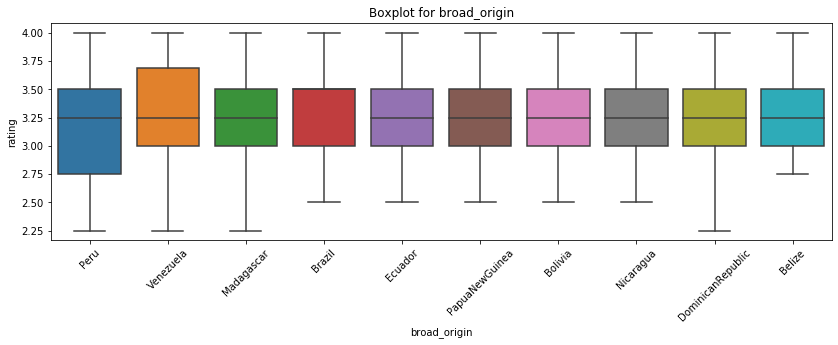

In [52]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

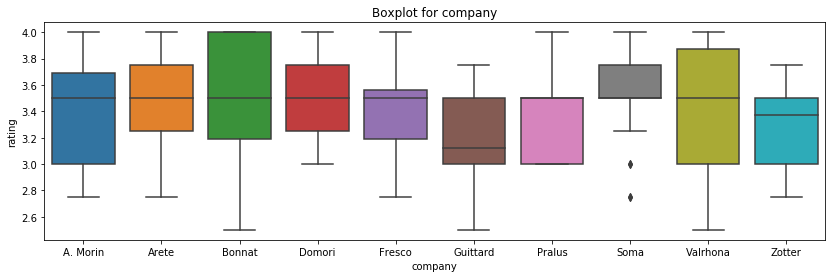

In [53]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x='company', y='rating', 
                data=cacao.loc[cacao.loc[:, 'company'].isin(cacao.loc[:, 'company'].value_counts().index[:10])],
               ax=ax)
#plt.xticks(rotation=45)
ax.set_title('Boxplot for ' + 'company')
plt.show()

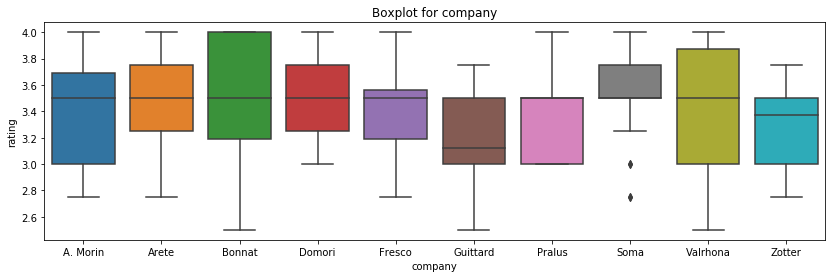

In [54]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x='company', y='rating', 
                data=cacao.loc[cacao.loc[:, 'company'].isin(cacao.loc[:, 'company'].value_counts().index[:10])])
#plt.xticks(rotation=45)
ax.set_title('Boxplot for ' + 'company')
plt.show()

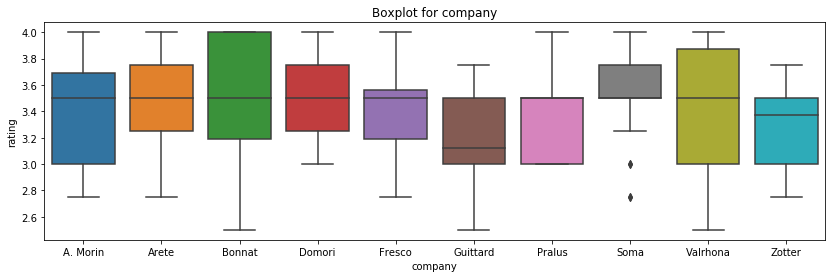

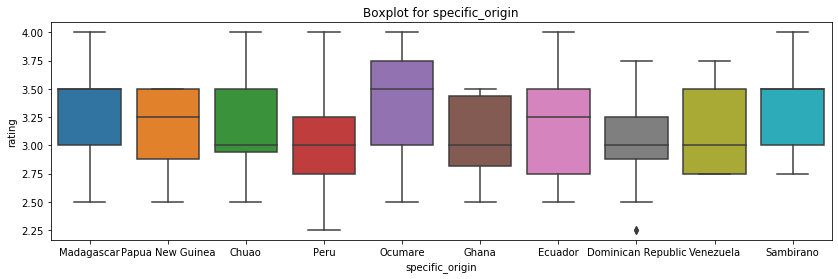

In [55]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x='company', y='rating', 
                data=cacao.loc[cacao.loc[:, 'company'].isin(cacao.loc[:, 'company'].value_counts().index[:10])])
#plt.xticks(rotation=45)
ax.set_title('Boxplot for ' + 'company')
plt.show()
fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x='specific_origin', y='rating', 
                data=cacao.loc[cacao.loc[:, 'specific_origin'].isin(cacao.loc[:, 'specific_origin'].value_counts().index[:10])])
#plt.xticks(rotation=45)
ax.set_title('Boxplot for ' + 'specific_origin')
plt.show()

In [56]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [57]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)


Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


In [58]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model.head()

,company,specific_origin,company_location,review_date,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
6,A. Morin,Cuba,France,2014,70.0


In [65]:
cols = cacao.loc[:, 'company'].value_counts().index[:20]
combinations_all = list(combinations(cols, 2))
for comb in combinations_all:
    if ttest_ind(cacao.loc[cacao.loc[:, 'company'] == comb[0], 'rating'], 
                    cacao.loc[cacao.loc[:, 'company'] == comb[1], 'rating']).pvalue \
                    <= 0.05/len(combinations_all): # Учли поправку Бонферони
        print('Найдены статистически значимые различия для колонки', 'company')
        

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки company


In [90]:
cols = cacao.loc[:, 'company'].value_counts().index
cols

Index(['Soma', 'Bonnat', 'Fresco', 'Pralus', 'Domori', 'Valrhona', 'Guittard',
       'A. Morin', 'Arete', 'Zotter',
       ...
       'Cemoi', 'Chocolate Conspiracy', 'Pura Delizia', 'Bernachon',
       'Chocosol', 'Lilla', 'Tan Ban Skrati', 'Svenska Kakaobolaget', 'Indi',
       'Condor'],
      dtype='object', length=395)

In [88]:
combinations_all = list(combinations(cols, 2))
combinations_all

[(45, 24),
 (45, 24),
 (45, 23),
 (45, 22),
 (45, 19),
 (45, 18),
 (45, 18),
 (45, 18),
 (45, 16),
 (45, 16),
 (45, 16),
 (45, 16),
 (45, 16),
 (45, 15),
 (45, 15),
 (45, 15),
 (45, 14),
 (45, 14),
 (45, 13),
 (45, 12),
 (45, 11),
 (45, 11),
 (45, 11),
 (45, 11),
 (45, 11),
 (45, 11),
 (45, 10),
 (45, 10),
 (45, 10),
 (45, 10),
 (45, 10),
 (45, 10),
 (45, 9),
 (45, 9),
 (45, 9),
 (45, 9),
 (45, 9),
 (45, 9),
 (45, 9),
 (45, 9),
 (45, 9),
 (45, 9),
 (45, 8),
 (45, 8),
 (45, 8),
 (45, 8),
 (45, 8),
 (45, 8),
 (45, 8),
 (45, 8),
 (45, 8),
 (45, 7),
 (45, 7),
 (45, 7),
 (45, 7),
 (45, 7),
 (45, 7),
 (45, 7),
 (45, 7),
 (45, 7),
 (45, 7),
 (45, 7),
 (45, 7),
 (45, 7),
 (45, 7),
 (45, 7),
 (45, 6),
 (45, 6),
 (45, 6),
 (45, 6),
 (45, 6),
 (45, 6),
 (45, 6),
 (45, 6),
 (45, 6),
 (45, 6),
 (45, 6),
 (45, 6),
 (45, 6),
 (45, 6),
 (45, 6),
 (45, 6),
 (45, 5),
 (45, 5),
 (45, 5),
 (45, 5),
 (45, 5),
 (45, 5),
 (45, 5),
 (45, 5),
 (45, 5),
 (45, 5),
 (45, 5),
 (45, 5),
 (45, 5),
 (45, 5),
 (45, 5)

In [89]:
for comb in combinations_all:
    print('ttest_ind:', ttest_ind(cacao.loc[cacao.loc[:, 'company'] == comb[0], 'rating'], 
                    cacao.loc[cacao.loc[:, 'company'] == comb[1], 'rating']).pvalue)
    if ttest_ind(cacao.loc[cacao.loc[:, 'company'] == comb[0], 'rating'], 
                    cacao.loc[cacao.loc[:, 'company'] == comb[1], 'rating']).pvalue \
                    <= 0.05/len(combinations_all): # Учли поправку Бонферони
        print('Найдены статистически значимые различия для колонки', 'company')

ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind:

ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind:

ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind:

ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind:

ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind:

ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind:

ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind:

ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind:

ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind: nan
ttest_ind:

KeyboardInterrupt: 

In [ ]:
cacao.loc[cacao.loc[:, 'company'] == comb[0], 'rating']

In [ ]:
comb[0]

In [70]:
cacao.loc[cacao.loc[:, 'company'] == comb[1], 'rating']

1281    3.25
1282    3.00
1283    3.25
1284    3.75
1285    3.00
1286    3.00
1287    3.00
1288    4.00
1289    3.75
1290    4.00
1291    3.50
1292    4.00
1293    3.00
Name: rating, dtype: float64

In [77]:
ttest_ind(cacao.loc[cacao.loc[:, 'company'] == comb[0], 'rating'], 
                    cacao.loc[cacao.loc[:, 'company'] == comb[1], 'rating']).pvalue

0.35027547017206107

In [73]:
cacao.loc[cacao.loc[:, 'company'] == comb[0]]

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
357,Castronovo,"Maya Mtn, Batch 454, Heirloom",1724,2016,72.0,U.S.A.,4.00,Trinitario,Belize
358,Castronovo,"the lost city, gracias a dias, batch 362",1570,2015,72.0,U.S.A.,3.50,Trinitario,Honduras
359,Castronovo,"Duarte, Batch 360",1570,2015,70.0,U.S.A.,3.75,"Criollo, Trinitario",DomincanRepublic
360,Castronovo,"Piaroa, Amazonas, Batch 350",1574,2015,72.0,U.S.A.,3.50,None,Venezuela
361,Castronovo,Sierra Nevada,1347,2014,72.0,U.S.A.,3.50,"Criollo, Trinitario",Colombia
362,Castronovo,Arauca,1371,2014,76.0,U.S.A.,3.50,"Criollo, Trinitario",Colombia
363,Castronovo,Elvesia P.,1407,2014,70.0,U.S.A.,2.75,Trinitario,DominicanRepublic
364,Castronovo,Bolivia,1101,2013,70.0,U.S.A.,3.00,Trinitario,Bolivia
365,Castronovo,None,1101,2013,73.0,U.S.A.,3.50,Trinitario,DominicanRepublic
366,Castronovo,San Martin,1105,2013,70.0,U.S.A.,2.50,Criollo,Peru
